# CAPSTONE PROJECT (WALMART)

In [73]:
# Importing new libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Loading dataset
df = pd.read_csv('Walmart.csv')

In [75]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [77]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [78]:
df.describe()

Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874000  
75%      74.940000     3.735000   212.743293      8.622000  
max     100.140000     4.468000   227.232807     14.313000  
std      18.444933     0.459020    39.356712      1.875885

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [80]:
# Check the missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [81]:
# Check the Duplicates
df.duplicated().sum()

np.int64(0)

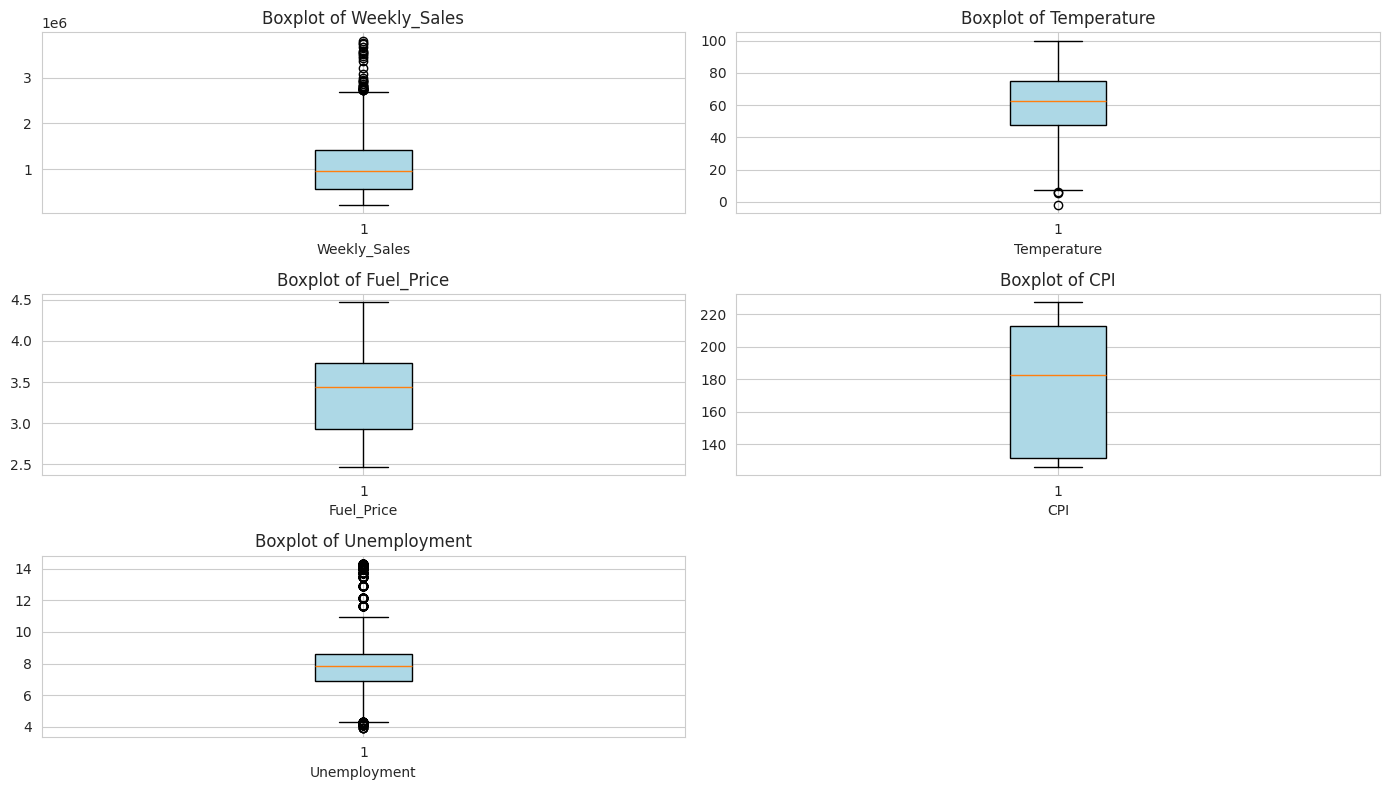

In [82]:
# Boxplots for outlier detection
plt.figure(figsize=(14, 8))
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [83]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [84]:
# Apply outlier removal on numerical columns
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

In [85]:
# Compare dataset sizes before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")

Original dataset size: 6435
Cleaned dataset size: 5917


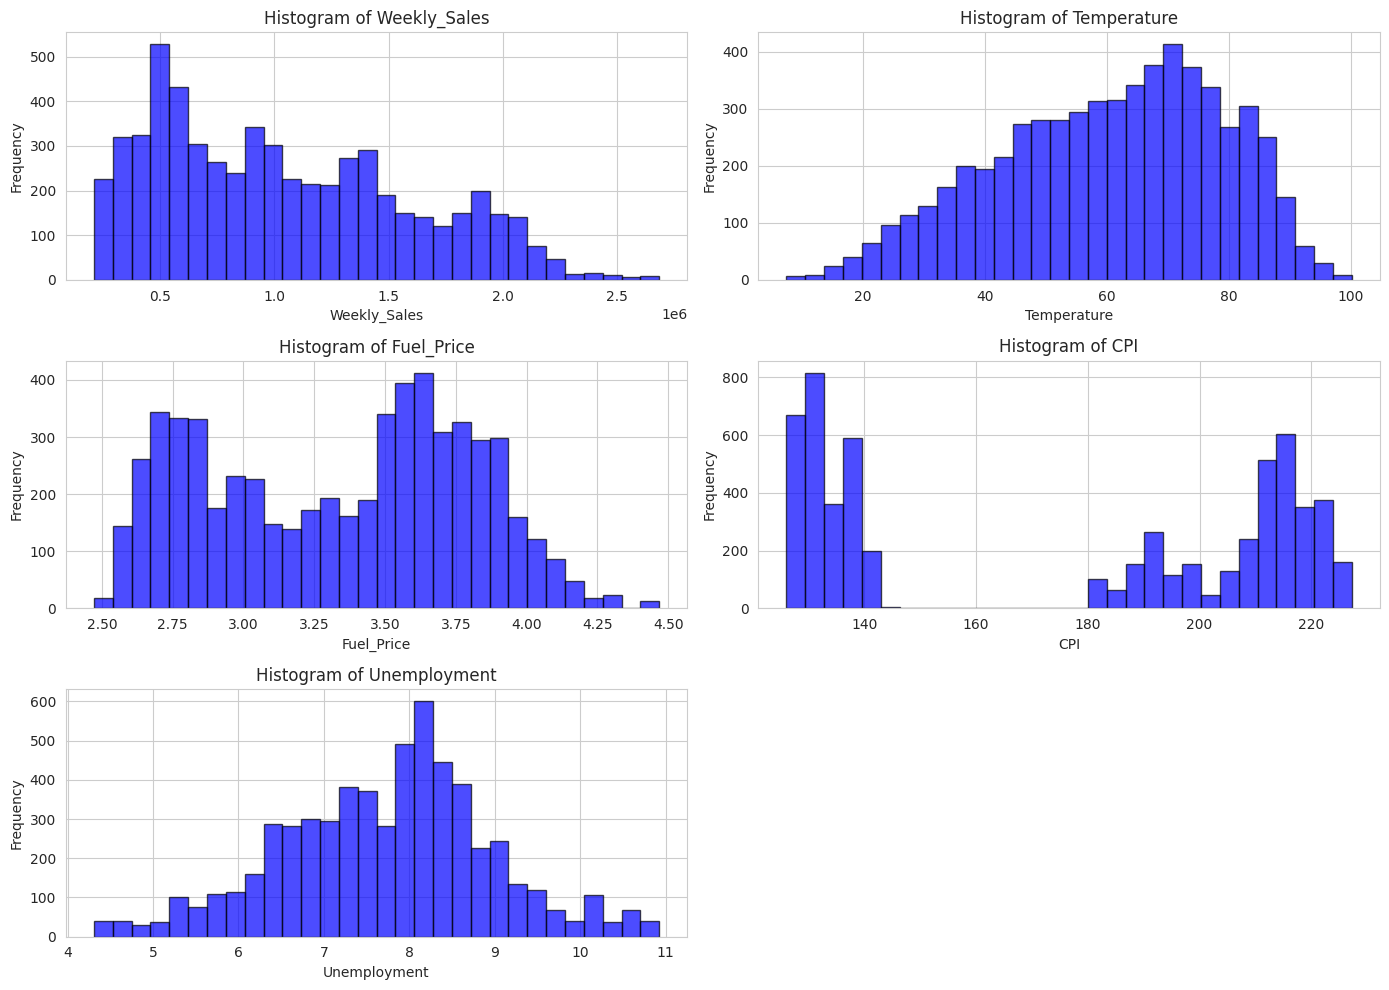

In [86]:
# Create histograms for numerical columns using matplotlib
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    plt.hist(df_cleaned[col], bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

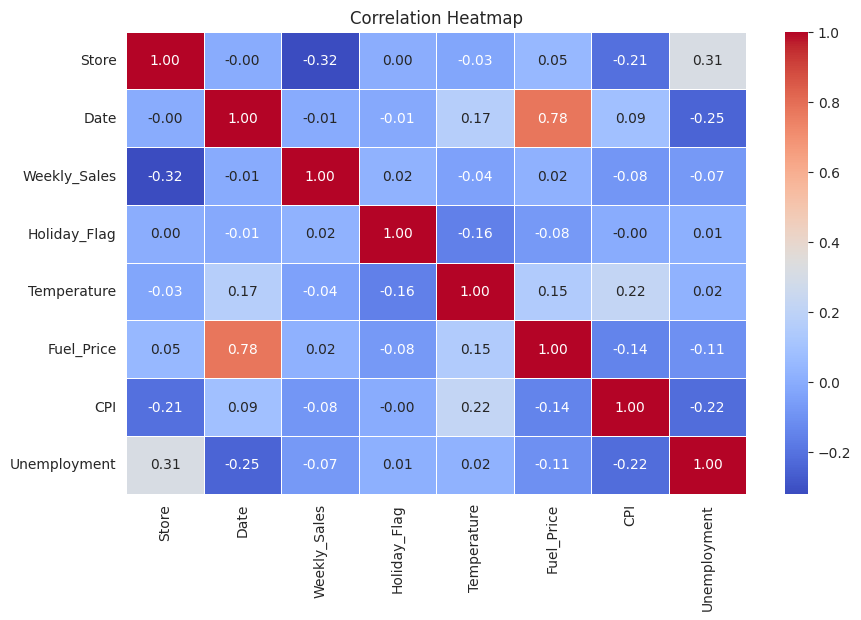

In [87]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

---
#### The EDA part is completed
---

#### 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:


#### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


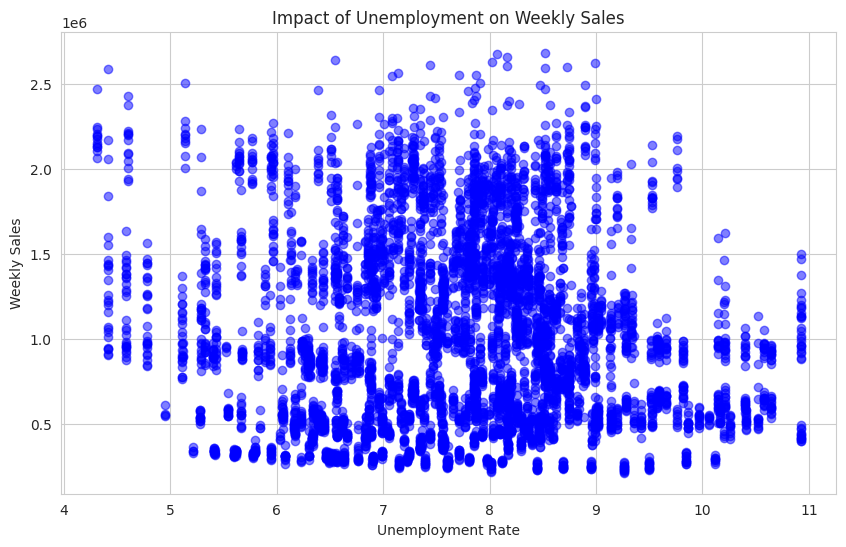

In [88]:
# Analyzing the impact of unemployment on weekly sales
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Unemployment'], df_cleaned['Weekly_Sales'], alpha=0.5, color='blue')
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.title("Impact of Unemployment on Weekly Sales")
plt.show()

In [89]:
# Finding stores most affected by unemployment
correlation_by_store = df_cleaned.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().unstack().iloc[:, 1]
affected_stores = correlation_by_store.abs().sort_values(ascending=False).head(5)
print("Top 5 Stores Most Affected by Unemployment:")
print(affected_stores)

Top 5 Stores Most Affected by Unemployment:
Store
36    0.833734
44    0.780076
4     0.633422
35    0.483865
13    0.400254
Name: (Unemployment, Weekly_Sales), dtype: float64


#### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [90]:
# Analyzing seasonal trends in weekly sales
df_cleaned['Month'] = df_cleaned['Date'].dt.month
monthly_sales = df_cleaned.groupby('Month')['Weekly_Sales'].mean()

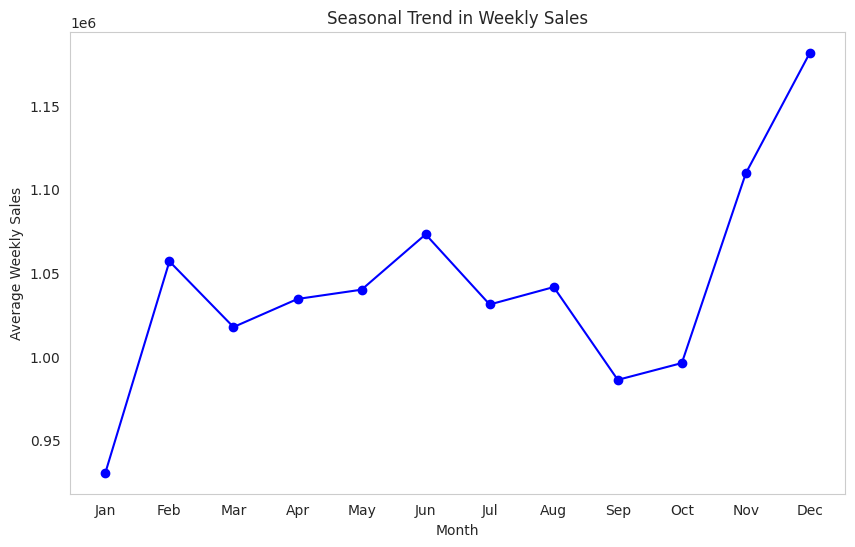

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.title("Seasonal Trend in Weekly Sales")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

In [92]:
# Identifying peak sales months and possible reasons
peak_months = monthly_sales.sort_values(ascending=False).head(3)
print("Months with highest average weekly sales:")
print(peak_months)
print("Possible reasons: Holiday season (Nov-Dec), Back-to-school sales (Aug), Summer sales trends.")

Months with highest average weekly sales:
Month
12    1.181804e+06
11    1.109696e+06
6     1.073075e+06
Name: Weekly_Sales, dtype: float64
Possible reasons: Holiday season (Nov-Dec), Back-to-school sales (Aug), Summer sales trends.


#### c. Does temperature affect the weekly sales in any manner?

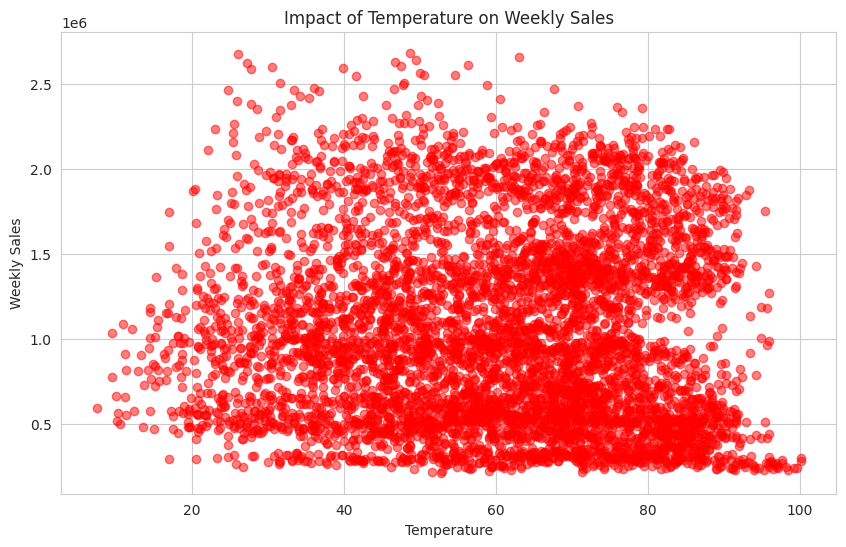

In [93]:
# Analyzing the impact of temperature on weekly sales
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Temperature'], df_cleaned['Weekly_Sales'], alpha=0.5, color='red')
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Impact of Temperature on Weekly Sales")
plt.show()

In [94]:
# Calculating correlation between temperature and weekly sales
temp_sales_corr = df_cleaned[['Temperature', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Correlation between Temperature and Weekly Sales: {temp_sales_corr:.2f}")
if abs(temp_sales_corr) > 0.3:
    print("There is a moderate relationship between temperature and weekly sales.")
else:
    print("Temperature does not significantly affect weekly sales.")

Correlation between Temperature and Weekly Sales: -0.04
Temperature does not significantly affect weekly sales.


#### d. How is the Consumer Price index affecting the weekly sales of various stores?

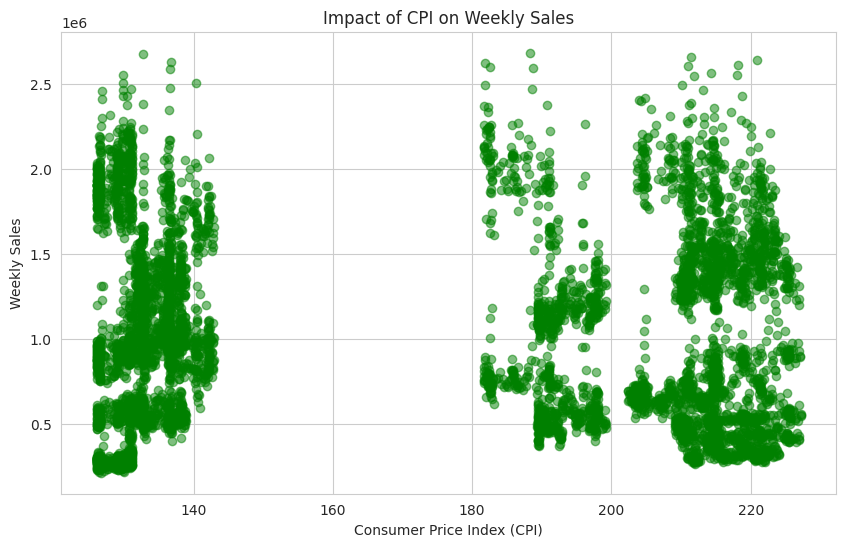

In [95]:
# Analyzing the impact of CPI on weekly sales
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['CPI'], df_cleaned['Weekly_Sales'], alpha=0.5, color='green')
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("Weekly Sales")
plt.title("Impact of CPI on Weekly Sales")
plt.show()

In [96]:
# Calculating correlation between CPI and weekly sales
cpi_sales_corr = df_cleaned[['CPI', 'Weekly_Sales']].corr().iloc[0, 1]
print(f"Correlation between CPI and Weekly Sales: {cpi_sales_corr:.2f}")
if abs(cpi_sales_corr) > 0.3:
    print("There is a moderate relationship between CPI and weekly sales.")
else:
    print("CPI does not significantly affect weekly sales.")

Correlation between CPI and Weekly Sales: -0.08
CPI does not significantly affect weekly sales.


#### e. Top performing stores according to the historical data.


In [97]:
# Identifying top-performing stores
top_stores = df_cleaned.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Performing Stores:")
print(top_stores)

Top 5 Performing Stores:
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


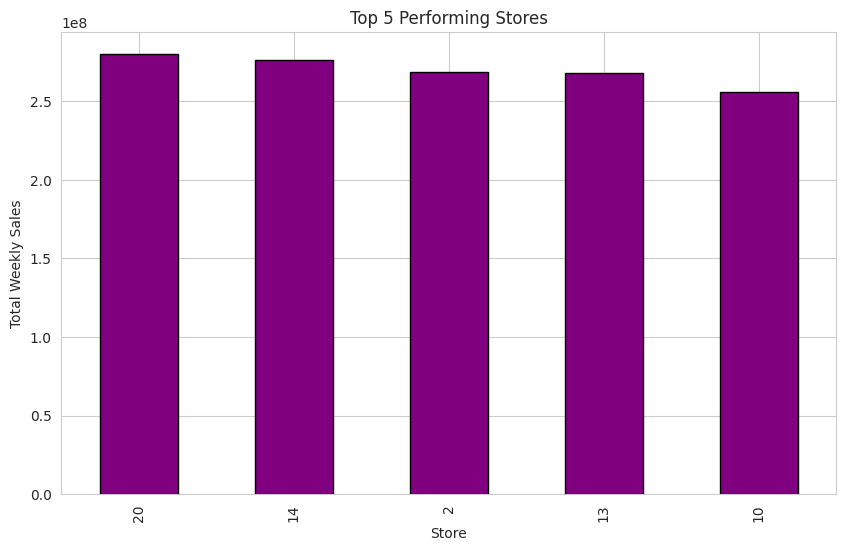

In [98]:
plt.figure(figsize=(10, 6))
top_stores.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.title("Top 5 Performing Stores")
plt.show()

#### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [99]:
# Identifying the worst-performing store
worst_store = df_cleaned.groupby('Store')['Weekly_Sales'].sum().sort_values().head(1)
print("Worst Performing Store:")
print(worst_store)

Worst Performing Store:
Store
38    7347378.89
Name: Weekly_Sales, dtype: float64


In [100]:
# Difference between best and worst performing stores
best_store_sales = top_stores.iloc[0]
worst_store_sales = worst_store.iloc[0]
difference = best_store_sales - worst_store_sales
print(f"Difference between highest and lowest performing stores: {difference}")

Difference between highest and lowest performing stores: 272676355.92


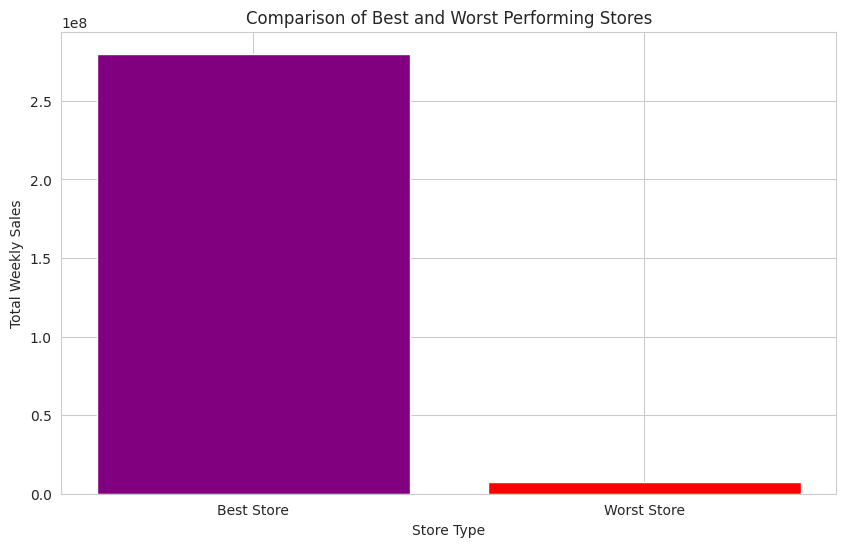

In [101]:
# Visualizing worst vs. best store performance
plt.figure(figsize=(10, 6))
plt.bar(['Best Store', 'Worst Store'], [best_store_sales, worst_store_sales], color=['purple', 'red'])
plt.xlabel("Store Type")
plt.ylabel("Total Weekly Sales")
plt.title("Comparison of Best and Worst Performing Stores")
plt.show()

### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

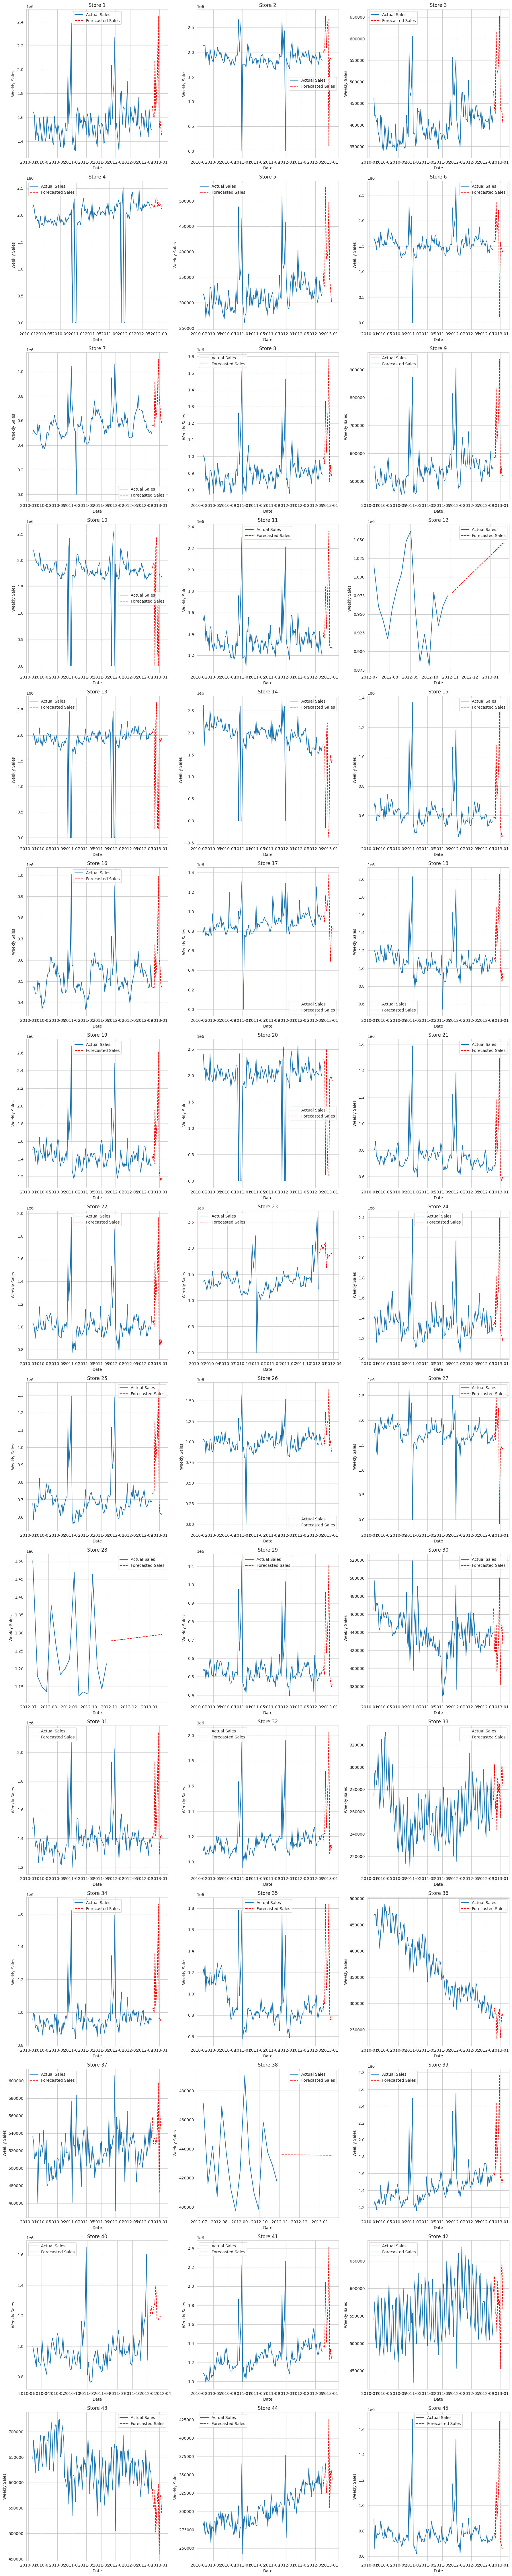

Sales forecasting for all valid stores completed.


In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Forecasting sales for the next 12 weeks
forecast_results = {}
stores = df_cleaned['Store'].unique()
valid_stores = []

for store in stores:
    store_data = df_cleaned[df_cleaned['Store'] == store].set_index('Date')['Weekly_Sales']
    store_data = store_data.resample('W').sum()
    if len(store_data) > 12:  # Ensure sufficient data
        valid_stores.append(store)

if not valid_stores:
    print("No stores have enough data for forecasting.")
else:
    num_valid_stores = len(valid_stores)
    rows = (num_valid_stores // 3) + (1 if num_valid_stores % 3 != 0 else 0)
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(18, 6 * rows))
    axes = axes.flatten()

    for idx, store in enumerate(valid_stores):
        store_data = df_cleaned[df_cleaned['Store'] == store].set_index('Date')['Weekly_Sales']
        store_data = store_data.resample('W').sum()

        if len(store_data) < 13:
            continue  # Skip stores with insufficient data

        seasonal_periods = 52 if len(store_data) >= 104 else 12 if len(store_data) >= 24 else None

        if seasonal_periods:
            model = ExponentialSmoothing(store_data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
        else:
            model = ExponentialSmoothing(store_data, trend='add', seasonal=None)

        model_fit = model.fit()
        forecast = model_fit.forecast(12)
        forecast_results[store] = forecast

        # Plot the forecast in subplots
        ax = axes[idx]
        ax.plot(store_data.index, store_data, label='Actual Sales')
        ax.plot(forecast.index, forecast, label='Forecasted Sales', linestyle='dashed', color='red')
        ax.set_title(f"Store {store}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Weekly Sales")
        ax.legend()

    # Hide unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print("Sales forecasting for all valid stores completed.")

---
#### Project Completed
---


